In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [8]:
names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

thin fgsm 8
cat -> bird
dog -> deer
dog -> cat
automobile -> deer


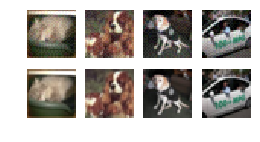

thin opt 8
truck -> dog
horse -> dog
cat -> dog
dog -> cat


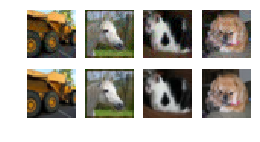

wide fgsm 8
dog -> cat
deer -> bird
horse -> bird
dog -> cat


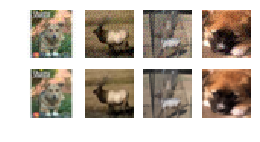

wide opt 8
automobile -> deer
truck -> automobile
deer -> frog
frog -> deer


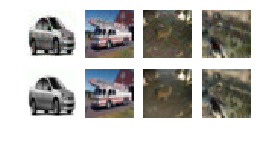

tutorial fgsm 8
truck -> airplane
cat -> dog
bird -> deer
automobile -> truck


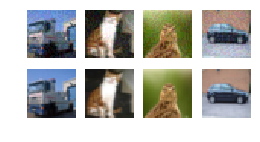

tutorial opt 8
bird -> deer
cat -> dog
automobile -> truck
frog -> deer


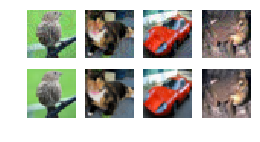

In [9]:
attacks = ['fgsm', 'opt']
epsilon = '8'
models = ['thin', 'wide', 'tutorial']
opt_offset = 6705
num_samples = 4
gs = matplotlib.gridspec.GridSpec(2, num_samples)

orig_imgs = np.load('test_orig.npy')
gt = np.argmax(np.load('test_labels.npy'), axis=1)

for m in models:
    preds_orig = np.load('preds_orig_%s.npy' % m)
    for a in attacks:
        print m, a, epsilon
        imgs = np.load('test_%s_%s_%s.npy' % (m, a, epsilon))
        preds_adv = np.load('preds_%s_%s_%s_%s.npy' % (m, a, epsilon, m))
        if a == 'opt':
            batch = slice(opt_offset, opt_offset + len(imgs))
            orig_imgs_slice = orig_imgs[batch]
            gt_slice = gt[batch]
            preds_orig_slice = preds_orig[batch]
        else:
            orig_imgs_slice = orig_imgs
            gt_slice = gt
            preds_orig_slice = preds_orig

        success_indices, = np.where(np.not_equal(preds_adv, preds_orig_slice))
        samples = np.random.choice(success_indices, num_samples, replace=False)

        plt.figure(figsize=(num_samples, 2))
        for i in range(num_samples):
            print names[preds_orig_slice[samples[i]]], '->', names[preds_adv[samples[i]]]
            plt.subplot(gs[0, i])
            plt.imshow(imgs[samples[i]] / 255)
            plt.axis('off')
            plt.subplot(gs[1, i])
            plt.imshow(orig_imgs_slice[samples[i]] / 255)
            plt.axis('off')
        plt.show()

max 16.0


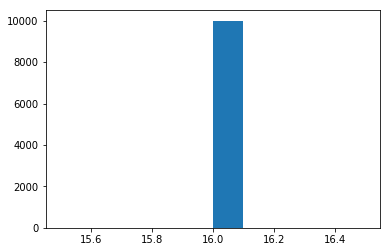

In [11]:
adv = np.load('test_thin_fgsm_16.npy')
# offset = 6705
# count = len(adv)
# orig_slice = np.load('test_orig.npy')[offset:offset+count]
orig_slice = np.load('test_orig.npy')
li = np.amax(np.abs(adv - orig_slice), axis=(1, 2, 3))
print 'max', np.max(li)
plt.hist(li)
plt.show()

(10000, 32, 32, 3) float32 0.0 255.0


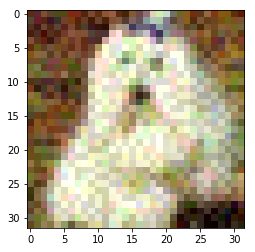

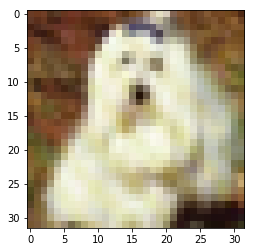

In [20]:
print adv.shape, adv.dtype, np.min(adv), np.max(adv)
index = 6711
plt.imshow(adv[index] / 255)
plt.show()
plt.imshow(orig_slice[index] / 255)
plt.show()